In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier as xgb
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
sns.set_style('whitegrid')
import kagglehub


In [323]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\VEDAG\.cache\kagglehub\datasets\redwankarimsony\heart-disease-data\versions\6


In [324]:
df = pd.read_csv('heart_disease_uci.csv')

In [325]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [326]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Text(0, 0.5, 'count')

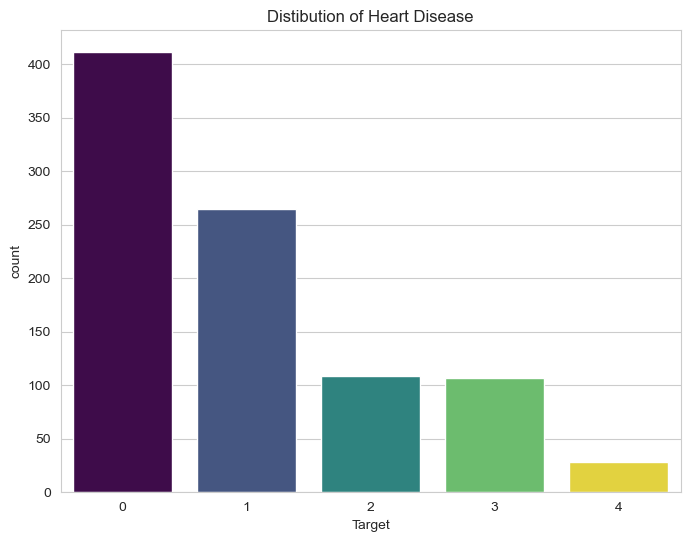

In [327]:
plt.figure(figsize=(8,6))
sns.countplot(x =df['num'],palette = 'viridis',hue=df['num'],legend = False)
plt.title('Distibution of Heart Disease')
plt.xlabel('Target')
plt.ylabel('count')

In [328]:
## Sub Plots 

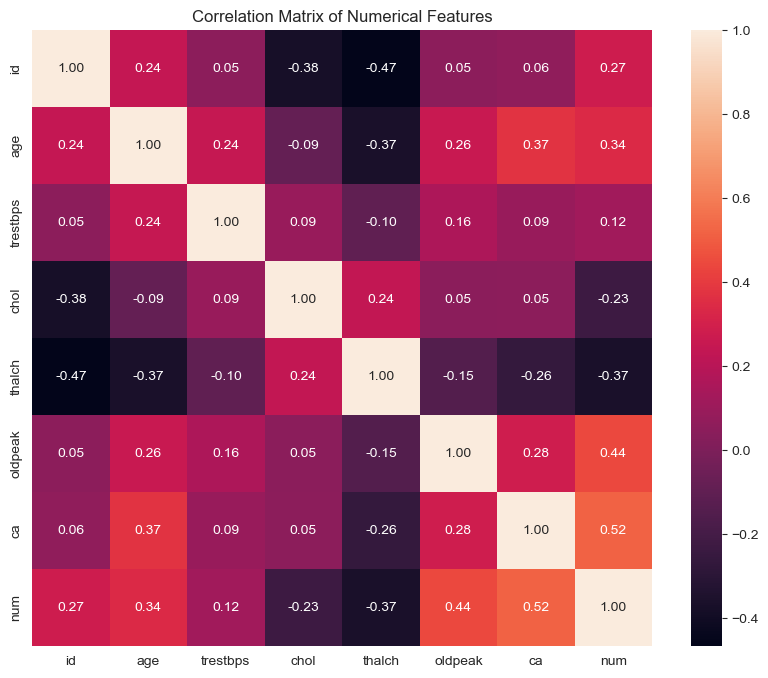

In [329]:
plt.figure(figsize=(10, 8))
corrmat = df.select_dtypes(include=np.number).columns
top_corr_matrix = df[corrmat].corr()
sns.heatmap(top_corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [330]:
from sklearn.impute import SimpleImputer

X = df.drop('num',axis=1)
y = df['num']

In [331]:
X.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


In [332]:
y.head()

0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64

In [333]:
X.drop(['dataset','id'],axis=1,inplace=True)

In [334]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


In [335]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

In [336]:
categorical_features

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [337]:
numerical_features

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca'], dtype='object')

In [338]:
numerical_transformer = Pipeline(steps= [
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [339]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

In [340]:
preprocessor = ColumnTransformer(
    transformers= [
        ('num' , numerical_transformer ,numerical_features),
        ('cat' , categorical_transformer,categorical_features)
    ]
)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [341]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


In [342]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

numerical_transformer = Pipeline(steps= [
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers= [
        ('num' , numerical_transformer ,numerical_features),
        ('cat' , categorical_transformer,categorical_features)
    ]
)

lr_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',LogisticRegression(random_state=42))
])
lr_pipeline.fit(X_train,y_train)
y_pred_lr = lr_pipeline.predict(X_test) 

In [343]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',RandomForestClassifier(random_state=42))
])
rf_pipeline.fit(X_train,y_train)
y_pred_rf = rf_pipeline.predict(X_test) 

In [344]:
from sklearn import svm
svm_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',svm.SVC(random_state=42))
])
svm_pipeline.fit(X_train,y_train)
y_pred_svm = svm_pipeline.predict(X_test) 

In [345]:
from sklearn.neighbors import KNeighborsClassifier
k_neighbors_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',KNeighborsClassifier())
])
k_neighbors_pipeline.fit(X_train,y_train)
y_pred_k_neigbors = k_neighbors_pipeline.predict(X_test) 

In [346]:

print("\n ---- Logistic Regression ------")
print(classification_report(y_pred_lr,y_test,zero_division=0))

print("\n ---- Random Forest  ------")
print(classification_report(y_pred_rf,y_test,zero_division=0))

print("\n ----  SVM ------")
print(classification_report(y_pred_svm,y_test,zero_division=0))

print("/n ---- K Nearest Neigbors ------")
print(classification_report(y_pred_k_neigbors,y_test,zero_division=0))



 ---- Logistic Regression ------
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        91
           1       0.53      0.46      0.49        61
           2       0.14      0.30      0.19        10
           3       0.19      0.19      0.19        21
           4       0.00      0.00      0.00         1

    accuracy                           0.57       184
   macro avg       0.34      0.34      0.33       184
weighted avg       0.62      0.57      0.59       184


 ---- Random Forest  ------
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        93
           1       0.53      0.53      0.53        53
           2       0.09      0.12      0.10        17
           3       0.10      0.10      0.10        21
           4       0.00      0.00      0.00         0

    accuracy                           0.56       184
   macro avg       0.32      0.30      0.31       184
weighted avg  

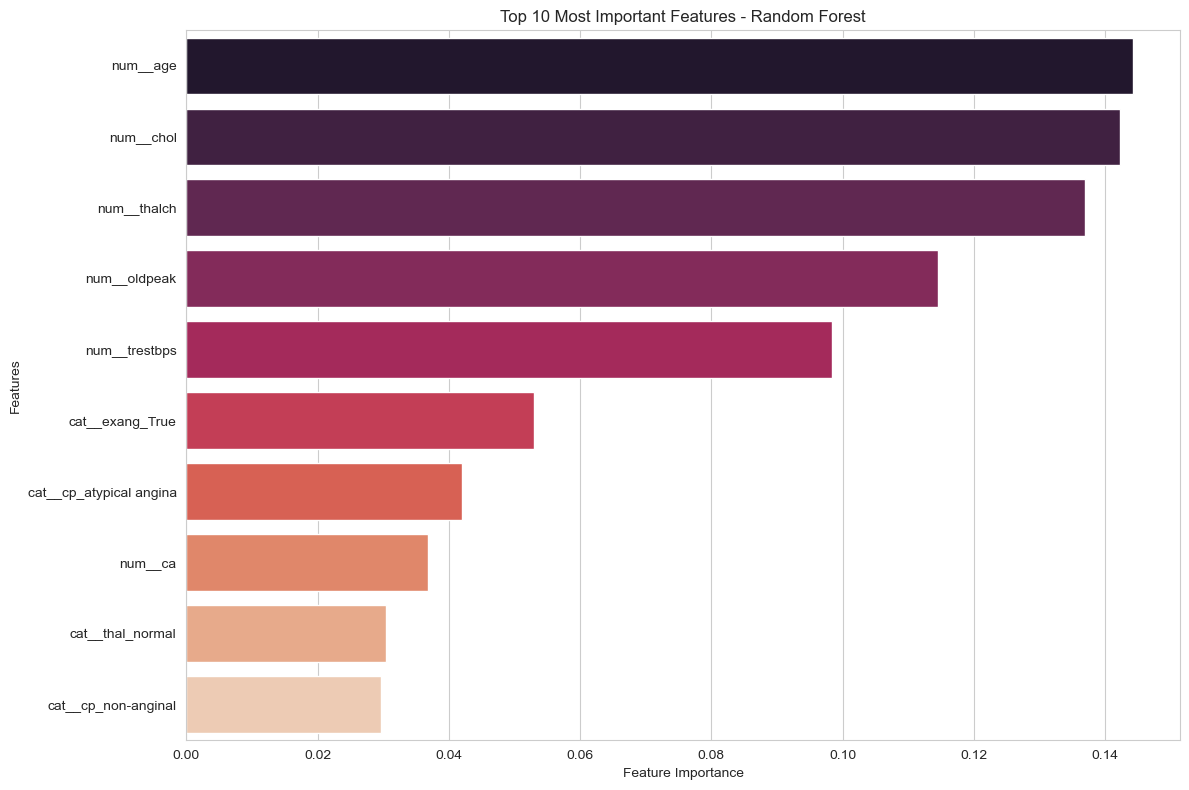

In [347]:
# Extract feature names after one-hot encoding
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Get feature importances from the trained model
importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names, 
    'Importance': importances
})

# Sort by importance and get top 10
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance_df, 
    palette='rocket', 
    hue='Feature', 
    dodge=False,
    legend=False
)
plt.title('Top 10 Most Important Features - Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()